In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.layers import Input,SimpleRNN,GRU,LSTM,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam,SGD

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load in the data
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train,x_test=x_train/255.0,x_test/255.0
print("x_train.shape:",x_train.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train.shape: (60000, 28, 28)


In [4]:
# Build the model
i = Input(shape=x_train[0].shape)
x = LSTM(128)(i)
x = Dense(10,activation='softmax')(x)

model = Model(i,x)

In [5]:
# Compile and train
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train,y_train,validation_data=(x_test,y_test),
              epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 72s 37ms/step - accuracy: 0.7731 - loss: 0.6749 - val_accuracy: 0.9547 - val_loss: 0.1450
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - accuracy: 0.9643 - loss: 0.1186 - val_accuracy: 0.9697 - val_loss: 0.0936
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 92s 43ms/step - accuracy: 0.9789 - loss: 0.0718 - val_accuracy: 0.9768 - val_loss: 0.0733
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 41ms/step - accuracy: 0.9827 - loss: 0.0576 - val_accuracy: 0.9828 - val_loss: 0.0547
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 104s 53ms/step - accuracy: 0.9865 - loss: 0.0443 - val_accuracy: 0.9850 - val_loss: 0.0517
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 113s 37ms/step - accuracy: 0.9879 - loss: 0.0389 - val_accuracy: 0.9827 - val_loss: 0.0531
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 35ms/step - accuracy: 0.9901 - loss: 0.0337 - val_accuracy: 0.9808 - val_loss: 0.0609
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 36ms/step - accuracy: 0.9916

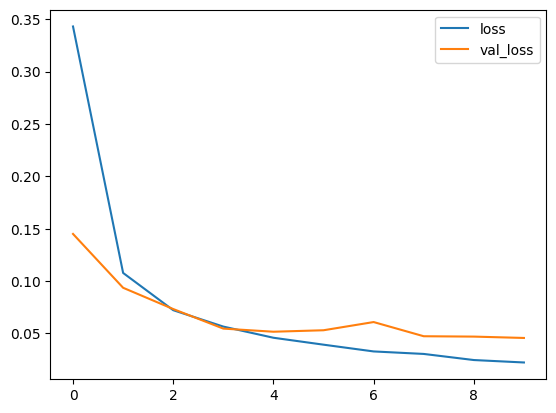

In [6]:
# Plot loss per iteration
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

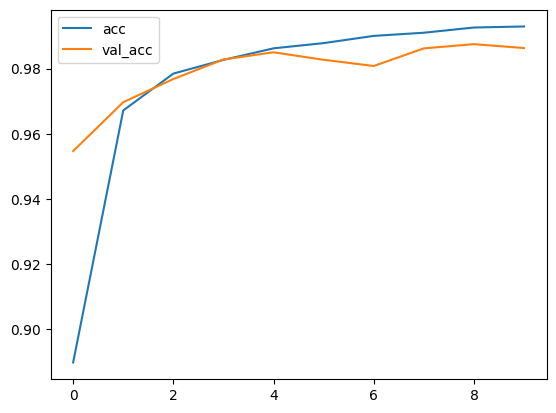

In [7]:
#Plot accuracy per iteration
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step
Confusion matrix, without normalization
[[ 975    0    0    0    0    0    4    1    0    0]
 [   2 1128    1    0    0    0    1    2    1    0]
 [   2    0 1023    1    3    0    0    2    1    0]
 [   0    0    4  999    0    3    0    2    1    1]
 [   0    0    0    0  964    0    2    1    1   14]
 [   0    0    1    5    1  881    2    0    2    0]
 [   3    2    0    0   16    2  935    0    0    0]
 [   0    4    9    1    0    0    0 1012    0    2]
 [   1    0    2    0    1    2    1    3  963    1]
 [   1    1    0    0   13    5    0    5    1  983]]


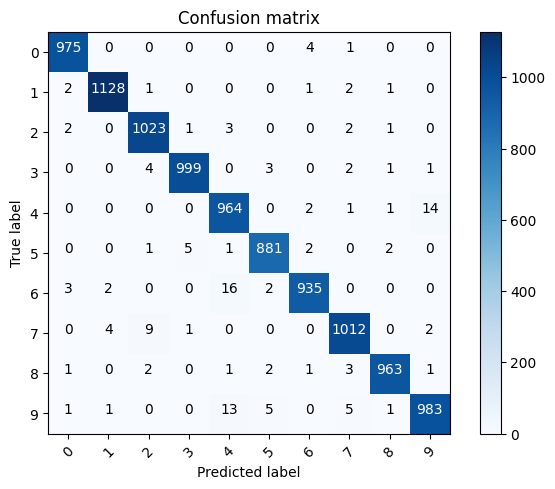

In [8]:
#Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
              horizontalalignment="center",
              color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))

# Do these results make sense?
# Is's easy to confuse 9<-->4,9<-->7,2<-->7,etc.

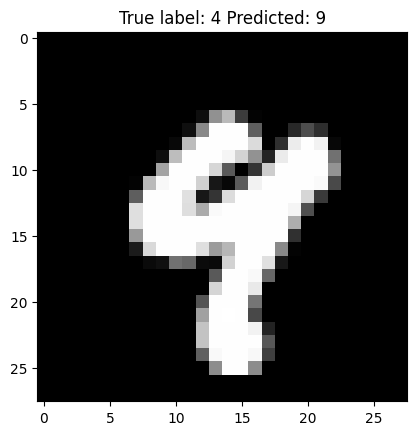

In [9]:
# Show some misclassified examples
misclassified_idx = np.where(p_test!=y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i],cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i],p_test[i]));